In [45]:
import nltk, re, string
from nltk.corpus import stopwords, twitter_samples
import numpy as np
import pandas as pd
import pickle
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package wordnet to C:\Users\Shobhit
[nltk_data]     Maurya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
data=pd.read_csv("sentiment_tweets3.csv")

In [6]:
data.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [10]:
data["label (depression result)"].value_counts()

0    8000
1    2314
Name: label (depression result), dtype: int64

In [11]:
data.shape

(10314, 3)

In [12]:
x=data["message to examine"]
y=data["label (depression result)"]

In [13]:
x

0        just had a real good moment. i missssssssss hi...
1               is reading manga  http://plurk.com/p/mzp1e
2        @comeagainjen http://twitpic.com/2y2lx - http:...
3        @lapcat Need to send 'em to my accountant tomo...
4            ADD ME ON MYSPACE!!!  myspace.com/LookThunder
                               ...                        
10309    No Depression by G Herbo is my mood from now o...
10310    What do you do when depression succumbs the br...
10311    Ketamine Nasal Spray Shows Promise Against Dep...
10312    dont mistake a bad day with depression! everyo...
10313                                                    0
Name: message to examine, Length: 10314, dtype: object

In [14]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10309    1
10310    1
10311    1
10312    1
10313    1
Name: label (depression result), Length: 10314, dtype: int64

In [15]:
stop_words = stopwords.words('english')
def data_cleaner(message):
    message = re.sub(r'http\S+', ' ', message)   
    message = re.sub(r'<.*?>',' ', message)      
    message = re.sub(r'\d+',' ', message)        
    message = re.sub(r'#\w+',' ', message)       
    message = re.sub(r'@\w+',' ', message)            
    message = " ".join([word for word in message.split() if not word in stop_words])
    return message
X_cleaned = x.apply(data_cleaner)
X_cleaned.head()

0                 real good moment. missssssssss much,
1                                        reading manga
2                                                    -
3    Need send 'em accountant tomorrow. Oddly, I ev...
4         ADD ME ON MYSPACE!!! myspace.com/LookThunder
Name: message to examine, dtype: object

In [18]:
lemma=WordNetLemmatizer()

In [23]:
messages=[]
for i in range(0, len(X_cleaned)):
    message = re.sub('[^a-zA-Z]', ' ', X_cleaned[i])
    message = message.lower()
    message = message.split()
    
    message = [lemma.lemmatize(word) for word in message if not word in stop_words]
    message = ' '.join(message)
    messages.append(message)

In [24]:
messages

['real good moment miss much',
 'reading manga',
 '',
 'need send em accountant tomorrow oddly even referring tax supporting evidence though',
 'add myspace myspace com lookthunder',
 'sleepy good time tonight though',
 'someone already said fiber home mean least regular',
 'c possible today nice',
 'nite twitterville workout ciao',
 'night darlin sweet dream',
 'good morning everybody',
 'finally created wordpress blog already blog seattle coffee community',
 'kisha cnt get u til get frm u remember ur top',
 'yes remember band awesome please reply',
 'really love reflection shadow',
 'ooo fantasy like fantasy novel check',
 'probs sell nothing blog get listen band itunes',
 'quot nokla connecting people quot',
 'stayed late start early good thing like job',
 'read new job congratulation fantastic',
 'able sleep think watch ugly betty online',
 'woo thanks ron steeve following yeow folowerssss haha p wanna got ellen show',
 'yeah sure sister take extra gd care',
 'yay duck want anythin

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(messages).toarray()

In [27]:
X.shape,y.shape

((10314, 13497), (10314,))

In [29]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10309    1
10310    1
10311    1
10312    1
10313    1
Name: label (depression result), Length: 10314, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train, y_train)

y_pred_nb=model.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix ,accuracy_score,classification_report

In [49]:
print(confusion_matrix(y_test,y_pred_nb))
print(accuracy_score(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

[[1569    4]
 [ 199  291]]
0.9015996122152206
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1573
           1       0.99      0.59      0.74       490

    accuracy                           0.90      2063
   macro avg       0.94      0.80      0.84      2063
weighted avg       0.91      0.90      0.89      2063



<AxesSubplot:>

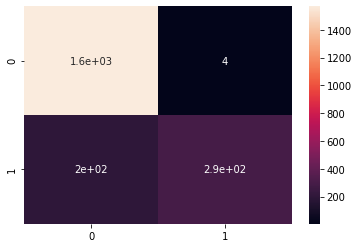

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred_nb),annot=True)

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [39]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1573    0]
 [  70  420]]
0.9660688317983519
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1573
           1       1.00      0.86      0.92       490

    accuracy                           0.97      2063
   macro avg       0.98      0.93      0.95      2063
weighted avg       0.97      0.97      0.97      2063



<AxesSubplot:>

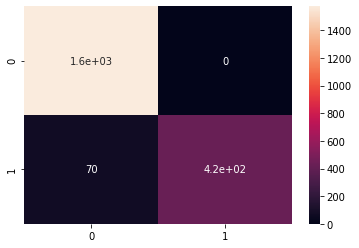

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)